In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introduction to Tensorflow in Python

### What is a tensor?
- Generalization of vectors and matrices
- Collection of numbers
- Specific shape

In [2]:
# 0D Tensor
d0 = tf.ones((1, ))
print("0D: ", d0.numpy())

# 1D Tensor
d1 = tf.ones((2,))
print("\n1D: ", d1.numpy())

# 2D Tensor
d2 = tf.ones((2, 2))
print("\n2D: ", d2.numpy())

# 3D Tensor
d3 = tf.ones((2, 2, 2))
print("\n3D: ", d3.numpy())

0D:  [1.]

1D:  [1. 1.]

2D:  [[1. 1.]
 [1. 1.]]

3D:  [[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]


### Constants and Variables

#### Constants
- Non trainable
- Can have any dimension

In [3]:
arr = np.array([[1,2,3,4], 
                [5,6,7,8], 
                [9,10,11,12], 
                [13,14,15,16]])
# Constant
const_1 = tf.constant(arr, shape=(2, 8))
print(const_1)

const_2 = tf.constant(2)
print(const_2)

c0 = tf.multiply(const_1, const_2)
print(c0)

c1 = const_1 * const_2
print(c1)

tf.Tensor(
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]], shape=(2, 8), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[ 2  4  6  8 10 12 14 16]
 [18 20 22 24 26 28 30 32]], shape=(2, 8), dtype=int32)
tf.Tensor(
[[ 2  4  6  8 10 12 14 16]
 [18 20 22 24 26 28 30 32]], shape=(2, 8), dtype=int32)


In [5]:
# Variable

var1 = tf.Variable(arr)
arr = arr.reshape((8, 2))
var2 = tf.Variable(arr)

c2 = tf.multiply(var1, var2)

print(c2.numpy())
print("Shape: ", c2.numpy().shape)
print("Dim: ", c2.numpy().ndim)
print(c2)

[[  1   4]
 [  9  16]
 [ 25  36]
 [ 49  64]
 [ 81 100]
 [121 144]
 [169 196]
 [225 256]]
Shape:  (8, 2)
Dim:  2
tf.Tensor(
[[  1   4]
 [  9  16]
 [ 25  36]
 [ 49  64]
 [ 81 100]
 [121 144]
 [169 196]
 [225 256]], shape=(8, 2), dtype=int32)


In [6]:
var3 = tf.Variable([1,2,3,4,5,6])
print(var3.numpy())

[1 2 3 4 5 6]


### What is a Tensorflow operation?

![](tf_graph.PNG)

The tensorflow graph contains edges and nodes, where edges are tensors and nodes are operations.

### Basic Operations

#### Performing tensor Addition
- ```add()``` operation performs element-wise addition with two tensors
- element-wise addition requires both tensors to have the same shape

#### Performing tensor Multiplication
- Element-wise multiplication performed using ```multiply()``` operation
    - The tensors multiplied must have the same shape
    - E.g [1,2,3] and [3,4,5] or [1,2] and [3,4]

- Matrix multiplication performed with ```matmul()``` operator
    - The ```matmul(A, B)``` operation multiplies A by B
    - Number of columns of A must equal the number of rows of B

In [24]:
a0 = tf.reshape(tf.ones_like(arr), (4, 4))
b0 = tf.constant([1, 2, 3, 4], shape=(4, 1))
c0 = tf.reshape(b0, (1, 4))

print(tf.add(a0, b0))
print(tf.add(a0, c0))

tf.Tensor(
[[2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]], shape=(4, 4), dtype=int32)
tf.Tensor(
[[2 3 4 5]
 [2 3 4 5]
 [2 3 4 5]
 [2 3 4 5]], shape=(4, 4), dtype=int32)


In [28]:
print(tf.multiply(a0, b0))
print(tf.matmul(a0, b0))

tf.Tensor(
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]], shape=(4, 4), dtype=int32)
tf.Tensor(
[[10]
 [10]
 [10]
 [10]], shape=(4, 1), dtype=int32)


### Summing over tensor dimensions

- The ```reduce_sum()``` operator sums over the dimensions of a tensor
- ```reduce_sum(A)``` sums over all dimensions of A
- ```reduce_sum(A, i)``` sums over dimension i

In [38]:
A = tf.ones([2,3,4])
print(A.numpy())

B = tf.reduce_sum(A)
print(B.numpy())

B0 = tf.reduce_sum(A, 0)
print(B0.numpy())

B1 = tf.reduce_sum(A, 1)
print(B1.numpy())

B2 = tf.reduce_sum(A, 2)
print(B2.numpy())

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
24.0
[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
[[3. 3. 3. 3.]
 [3. 3. 3. 3.]]
[[4. 4. 4.]
 [4. 4. 4.]]


### Advanced Operations

- ```gradient()``` - Computes the slope of a function at a point
- ```reshape()``` - Reshapes a tensor (e.g. 10x10 to 100x1)
- ```random()``` - Populates tensor with entries drawn from a probability distribution

![](gradient_tape.PNG)

### Calculating the gradient

![](x^2.PNG)

In [57]:
x = tf.Variable(-1.0)

# Define y within instance of GradientTape
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.multiply(x, x)
    print(y.numpy())
    print(x.numpy())
    
# Evaluate the gradient of y at x = -1
g = tape.gradient(y, x)
print(g.numpy())

1.0
-1.0
-2.0


### How to reshape a grayscale Image

In [67]:
# Generate grayscale image
gray = tf.random.uniform([2,2], maxval=255, dtype='int32')
print(gray.numpy())

# Reshape grayscale image
gray = tf.reshape(gray, [2*2, 1])
print(gray.numpy())

# Generate grayscale image
rgb = tf.random.uniform([2,2,3], maxval=255, dtype='int32')
print(rgb.numpy())

# Reshape grayscale image
rgb = tf.reshape(rgb, [2*2, 3])
print(rgb.numpy())

[[166 183]
 [240 213]]
[[166]
 [183]
 [240]
 [213]]
[[[ 73 135 136]
  [ 54  28   9]]

 [[ 53 148 109]
  [162 125  12]]]
[[ 73 135 136]
 [ 54  28   9]
 [ 53 148 109]
 [162 125  12]]


## Linear Models

### Input data

In [2]:
# Loading data using pandas
data = pd.read_csv('kc_house_data.csv')

print(data)

price = np.array(data['price'], dtype=np.float32)
waterfront = tf.cast(data['waterfront'], dtype=tf.bool)

print(type(price))
print(type(waterfront))

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

### Introduction to loss functions

- Fundamental ```tensorflow``` operation
    - Used to train a model
    - Measure of model fit
    
- Higher value -> worse fit
    - Minimize the loss function
    
### Common loss functions in Tensorflow

- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Huber error

- Loss functions are accessible from ```tf.keras.losses()```
    - ```tf.keras.losses.mse()```
    - ```tf.keras.losses.mae()```
    - ```tf.keras.losses.Huber()```
    
### Why do we care about loss functions?

![](loss.PNG)

### Notice below: 
MAE is much smaller than the MSE, even though price and predictions are the same. This is because the different loss functions penalize deviations of predictions from price differently. MSE does not like large deviations and punishes them harshly.

In [3]:
# Calculating loss with dummy targets and predictions tensor
target = tf.Variable([4,5,1,10,12,2,1])
prediction = tf.Variable([2,5,-10,11,0,2,1])

loss_mse = tf.keras.losses.mse(target, prediction)
print("Loss (mse): ", loss_mse.numpy())

loss_mae = tf.keras.losses.mae(target, prediction)
print("Loss (mae): ", loss_mae.numpy())

Loss (mse):  38
Loss (mae):  3


### Modifying the loss function

The purpose of modification is to construct a function of the trainable model variables that returns the loss which can then repeatedly evaluate this function for different variable values until you find the minimum. In practice, we will pass this function to an optimizer in tensorflow

In [4]:
scalar = tf.Variable(1.0, dtype=tf.float32)
targets = tf.Variable([2,4,6,8,10], dtype=tf.float32)
features = tf.Variable([1,2,3,4,5], dtype=tf.float32)

# Dummy model
def model(scalar, features=features):
    return scalar * features

# loss function
def loss_function(scalar, features=features, targets=targets):
    predictions = model(scalar, features)
    return tf.keras.losses.mae(targets, predictions)

print(loss_function(scalar).numpy())

3.0


### Linear Regression

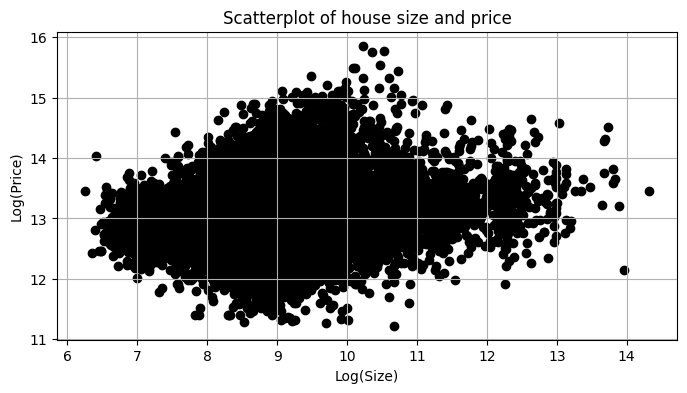

In [98]:
# Define targets and features

size = tf.cast(np.log(data['sqft_lot']), dtype=tf.float32)
price = tf.cast(np.log(data['price']), dtype=tf.float32)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), dpi=100)
ax.scatter(size, price, c='black')
ax.grid(True)
ax.set_xlabel('Log(Size)')
ax.set_ylabel('Log(Price)')
ax.set_title('Scatterplot of house size and price')
plt.show()

![](lin_reg.PNG)

In [100]:
# Define intercept and loss, these will be changed in the optimization step

slope = tf.Variable(0.1, tf.float32)
intercept = tf.Variable(0.1, tf.float32)

In [117]:
# Define a linear regression model

def linear_regression(slope, intercept, features=size):
    return tf.multiply(tf.add(intercept, features), slope)

# Compute predictions and loss
def loss_function(slope, intercept, targets=price, features=size):
    predictions = linear_regression(slope, intercept)
    return tf.keras.losses.mse(targets, predictions)

# Define Optimization Operation
opt = tf.keras.optimizers.Adam(0.1)

# Minimize the loss and print the loss
for i in range(1000):
    opt.minimize(lambda: loss_function(slope, intercept),
                 var_list=[slope, intercept])
#     print(loss_function(slope, intercept))
    
# print the trained parameters which are slope and intercept
print(intercept.numpy(), slope.numpy())

23.53733 0.40089026


In [118]:
# Predict
y = tf.add(tf.multiply(slope, size), intercept.numpy())

In [119]:
y

<tf.Tensor: shape=(21613,), dtype=float32, numpy=
array([27.000786, 27.100304, 27.229666, ..., 26.426891, 26.65554 ,
       26.335947], dtype=float32)>

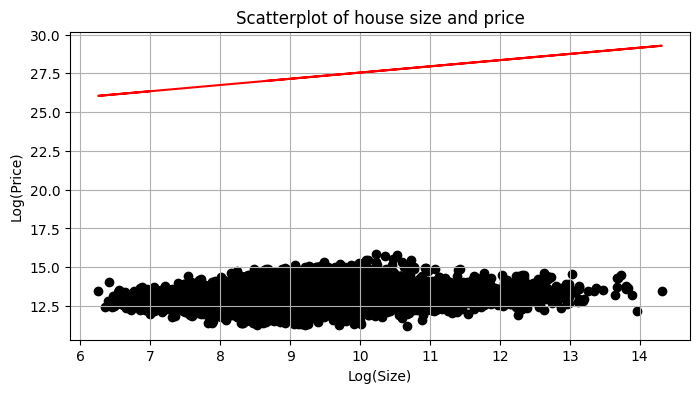

In [120]:
fig, ax = plt.subplots(figsize=(8, 4), nrows=1, ncols=1, dpi=100)
ax.scatter(size, price, c='black')
ax.plot(size, y, c='red')
ax.grid(True)
ax.set_xlabel('Log(Size)')
ax.set_ylabel('Log(Price)')
ax.set_title('Scatterplot of house size and price')
plt.show()

### Batch Training

When dataset is large, we divide dataset into batches and train on those batches sequentially. Single iteration on all batches is called an epoch. Used for large datasets. When memory is in small amount, we use batch training.

![](batch.PNG)

### The chunksize parameter

- ```pd.read_csv()``` allows us to load data in batches
    - Avoid loading entire dataset
    - ```chunksize``` parameter provides batch size

In [5]:
i = 0
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
    i += 1;
    print("Loaded Batch: {}".format(i))
    price = np.array(batch['price'], np.float32)
    size = np.array(batch['sqft_living'], np.float32)
#     print(price)
#     print(size)

Loaded Batch: 1
Loaded Batch: 2
Loaded Batch: 3
Loaded Batch: 4
Loaded Batch: 5
Loaded Batch: 6
Loaded Batch: 7
Loaded Batch: 8
Loaded Batch: 9
Loaded Batch: 10
Loaded Batch: 11
Loaded Batch: 12
Loaded Batch: 13
Loaded Batch: 14
Loaded Batch: 15
Loaded Batch: 16
Loaded Batch: 17
Loaded Batch: 18
Loaded Batch: 19
Loaded Batch: 20
Loaded Batch: 21
Loaded Batch: 22
Loaded Batch: 23
Loaded Batch: 24
Loaded Batch: 25
Loaded Batch: 26
Loaded Batch: 27
Loaded Batch: 28
Loaded Batch: 29
Loaded Batch: 30
Loaded Batch: 31
Loaded Batch: 32
Loaded Batch: 33
Loaded Batch: 34
Loaded Batch: 35
Loaded Batch: 36
Loaded Batch: 37
Loaded Batch: 38
Loaded Batch: 39
Loaded Batch: 40
Loaded Batch: 41
Loaded Batch: 42
Loaded Batch: 43
Loaded Batch: 44
Loaded Batch: 45
Loaded Batch: 46
Loaded Batch: 47
Loaded Batch: 48
Loaded Batch: 49
Loaded Batch: 50
Loaded Batch: 51
Loaded Batch: 52
Loaded Batch: 53
Loaded Batch: 54
Loaded Batch: 55
Loaded Batch: 56
Loaded Batch: 57
Loaded Batch: 58
Loaded Batch: 59
Loaded

### Training a linear model in batches

In [2]:
# Define trainable variables
intercept = tf.Variable(0.1, tf.float32)
slope = tf.Variable(0.1, tf.float32)

In [3]:
def linear_regression(intercept, slope, features):
    return intercept + features * slope

In [4]:
def loss_function(intercept, slope, targets, features):
    predictions = linear_regression(intercept, slope, features)
    return tf.keras.losses.mse(targets, predictions)

In [5]:
opt = tf.optimizers.Adam()

In [6]:
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
    price_batch = np.array(batch['price'], np.float32)
    size_batch = np.array(batch['sqft_lot'], np.float32)
    
    opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch),
                var_list=[intercept, slope])

In [7]:
print(intercept.numpy(), slope.numpy())

0.31781912 0.29831016


### Full sample versus batch training

![](full_vs_batch.PNG)

### Reference: Datacamp